# Описание проекта

Помогаем маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.Тема Афиша.Предположительно продаем билеты.

# Оглавление:

1. [Предобработка данных](#Шаг-1.-Предобработка-данных)
2. [Метрики](#Шаг-2.Метрики)
3. [Продуктовые метрики ](##-Продуктовые-метрики)
4. [E-commerce метрики](##E-commerce-метрики)
4. [Маркетинг](##Маркетинг)
5. [Вывод](#Вывод)

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import scipy
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial
import math as math

# Шаг 1. Предобработка данных

In [2]:
visits=pd.read_csv('/datasets/visits_log.csv')
orders=pd.read_csv('/datasets/orders_log.csv')
costs=pd.read_csv('/datasets/costs.csv')

In [3]:
display(visits)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits.duplicated().sum()

0

In [6]:
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [7]:
visits.columns=visits.columns.str.lower()

In [8]:
visits=visits.rename(columns={'start ts':'start_ts','source id':'source_id','end ts':'end_ts'})

In [9]:
visits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [10]:
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [11]:
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

С данными  посещениях все впорядке 

In [12]:
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [13]:
orders.columns=orders.columns.str.lower()

In [14]:
orders=orders.rename(columns={'buy ts':'buy_ts'})

In [15]:
orders.duplicated().sum()

0

In [16]:
orders.isna().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [17]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [18]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [19]:
costs.duplicated().sum()

0

С нашими данными все в порядке

# Шаг 2.Метрики


## Продуктовые метрики

In [20]:
visits_for_product_metrix=visits

In [21]:
visits_for_product_metrix['start_ts']=pd.to_datetime(visits_for_product_metrix['start_ts'])

In [22]:
visits_for_product_metrix['end_ts']=pd.to_datetime(visits_for_product_metrix['end_ts'])

In [23]:
visits_for_product_metrix['visits_year']  = visits_for_product_metrix['start_ts'].dt.year
visits_for_product_metrix['visits_month'] = visits_for_product_metrix['start_ts'].dt.month
visits_for_product_metrix['visits_week']  = visits_for_product_metrix['start_ts'].dt.week
visits_for_product_metrix['visits_date'] = visits_for_product_metrix['start_ts'].dt.date

In [24]:
visits_for_product_metrix

,device,end_ts,source_id,start_ts,uid,visits_year,visits_month,visits_week,visits_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02


#### расчет dau,wau,mau

Text(0.5, 1.0, 'Зависимость количества уникальных пользователей по дням')

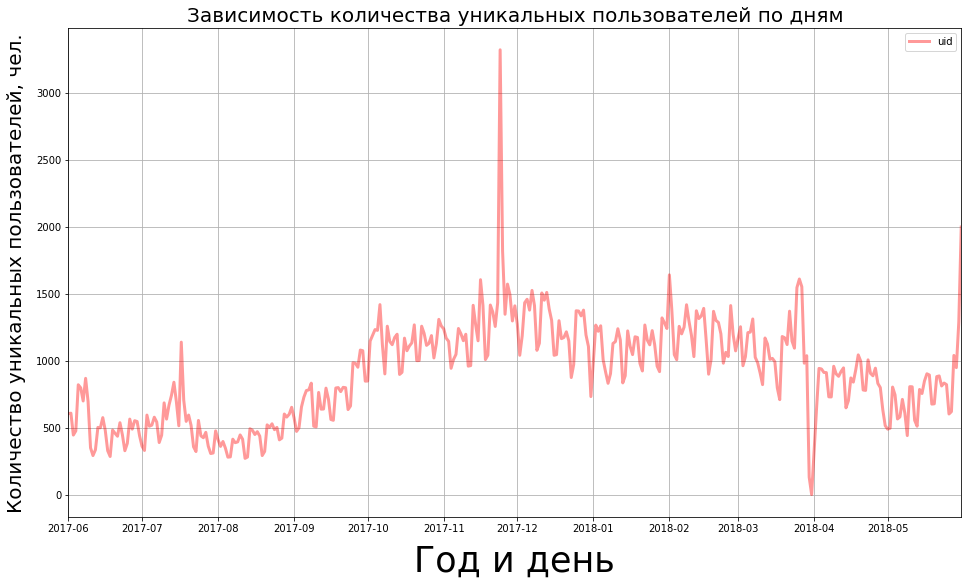

In [25]:
dau_visits = (visits_for_product_metrix.groupby('visits_date').agg({'uid': 'nunique'}))
ax = dau_visits.plot(grid = True, figsize = (16,9), linewidth=3, alpha=0.4, color='red', legend = True)
ax.set_xlabel("Год и день", fontsize=35, labelpad=10)
ax.set_ylabel("Количество уникальных пользователей, чел.", fontsize=20, labelpad=10)
ax.set_title("Зависимость количества уникальных пользователей по дням", fontsize=20)

In [26]:
dau_visits=visits_for_product_metrix.groupby('visits_date').agg({'uid':'nunique'}).mean()

In [27]:
dau_visits

uid    907.991758
dtype: float64

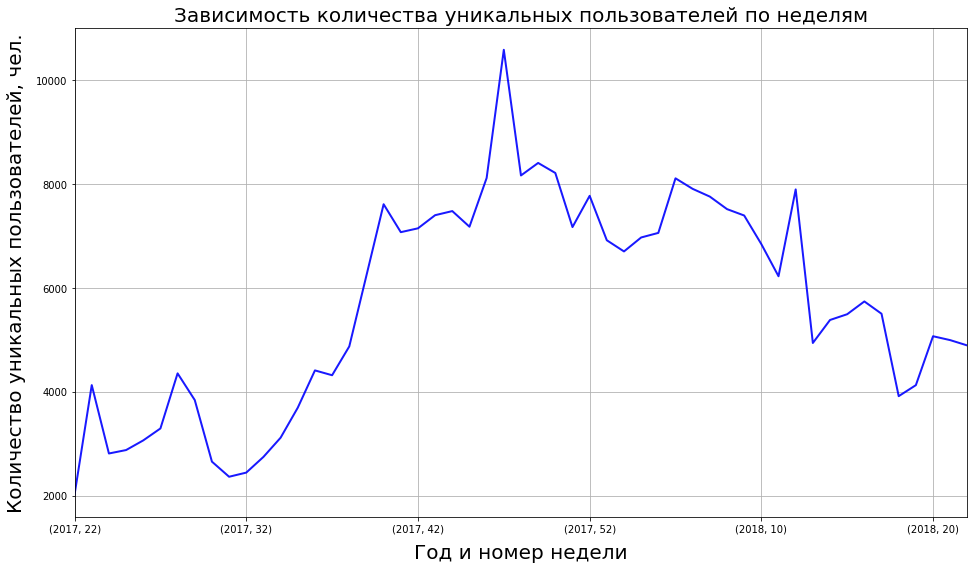

In [28]:
wau = (visits.groupby(['visits_year', 'visits_week']).agg({'uid': 'nunique'}))
ax = wau.plot(grid = True, figsize = (16,9), linewidth=2, alpha=0.9, color='blue', legend = False)
ax.set_xlabel("Год и номер недели", fontsize=20, labelpad=10)
ax.set_ylabel("Количество уникальных пользователей, чел.", fontsize=20, labelpad=10)
ax.set_title("Зависимость количества уникальных пользователей по неделям", fontsize=20)



ax.grid(which='minor', color = 'm', linestyle = ':')
plt.show()

In [29]:
wau_visits=visits_for_product_metrix.groupby(['visits_year','visits_week']).agg({'uid':'nunique'}).mean()

Text(0.5, 1.0, 'Зависимость количества уникальных пользователей по месяцам')

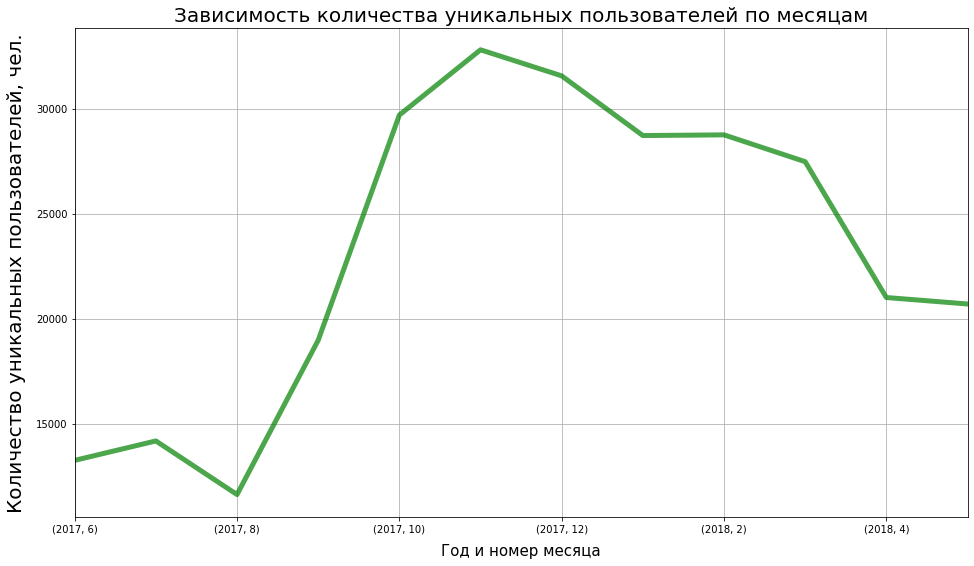

In [30]:
mau_visits = (visits_for_product_metrix.groupby(['visits_year', 'visits_month']).agg({'uid': 'nunique'}))
ax = mau_visits.plot(grid = True, figsize = (16,9), linewidth=5, alpha=0.7, color='green', legend = False)
ax.set_xlabel("Год и номер месяца", fontsize=15, labelpad=10)
ax.set_ylabel("Количество уникальных пользователей, чел.", fontsize=20, labelpad=10)
ax.set_title("Зависимость количества уникальных пользователей по месяцам", fontsize=20)


Можем заметить что произошло событие в ноябре ,вызвавшее рзекий скачок,недели подсказывают , что это середина ноября 

In [31]:
dau_visits=visits_for_product_metrix.groupby('visits_date').agg({'uid':'nunique'}).mean()

In [32]:
dau_visits

uid    907.991758
dtype: float64

In [33]:
mau_visits=visits_for_product_metrix.groupby(['visits_year','visits_month']).agg({'uid':'nunique'}).mean()

In [34]:
mau_visits

uid    23228.416667
dtype: float64

In [35]:
wau_visits=visits_for_product_metrix.groupby(['visits_year','visits_week']).agg({'uid':'nunique'}).mean()

In [36]:
wau_visits

uid    5716.245283
dtype: float64

посчитаем sticky-factor

In [37]:
sticky_factor_week = dau_visits/wau_visits*100

In [38]:
sticky_factor_week

uid    15.884409
dtype: float64

In [39]:
sticky_factor_month = dau_visits/mau_visits*100

In [40]:
sticky_factor_month

uid    3.90897
dtype: float64

уровень "прилипчивости заметно падает"

#### средняя продолжительность сесии

In [41]:
visits

,device,end_ts,source_id,start_ts,uid,visits_year,visits_month,visits_week,visits_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02


In [42]:
visits['end_ts'] = pd.to_datetime(
    visits['end_ts'], format="%Y-%m-%d %H:%M"
)

Text(0.5, 1.0, 'Зависимость количества уникальных пользователей по месяцам')

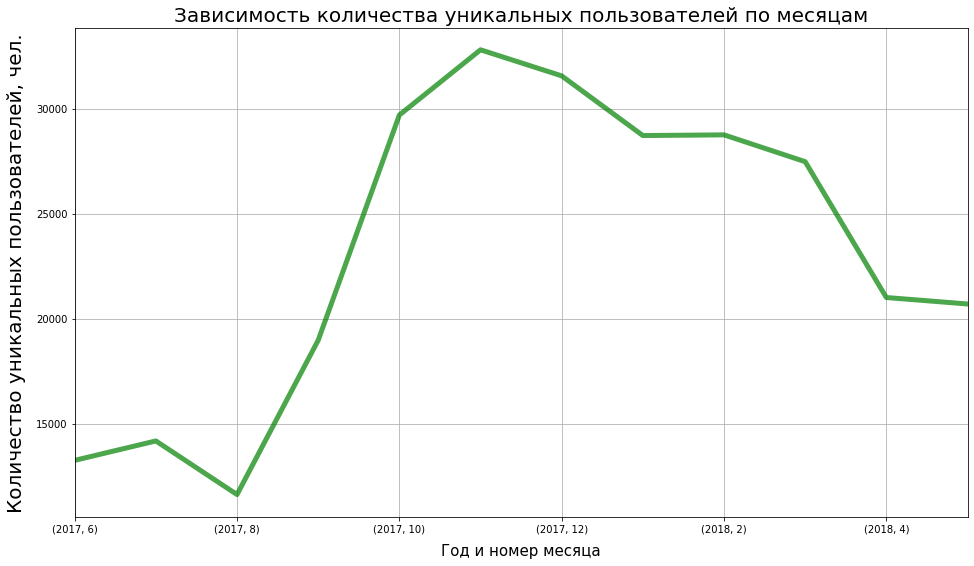

In [43]:
mau_visits = (visits_for_product_metrix.groupby(['visits_year', 'visits_month']).agg({'uid': 'nunique'}))
ax = mau_visits.plot(grid = True, figsize = (16,9), linewidth=5, alpha=0.7, color='green', legend = False)
ax.set_xlabel("Год и номер месяца", fontsize=15, labelpad=10)
ax.set_ylabel("Количество уникальных пользователей, чел.", fontsize=20, labelpad=10)
ax.set_title("Зависимость количества уникальных пользователей по месяцам", fontsize=20)


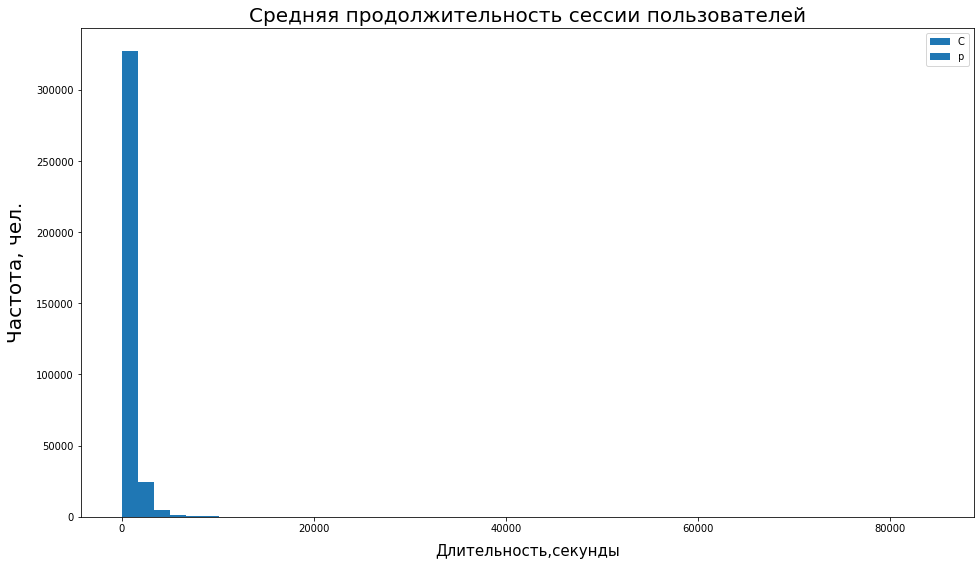

In [44]:
asl=visits['session_duration_sec'] =(
    visits['end_ts'] - visits['start_ts']
).dt.seconds

ax=asl.plot(kind='hist',bins=50,figsize=(16,9),legend = False)
ax.set_xlabel("Длительность,секунды", fontsize=15, labelpad=10)
ax.set_ylabel("Частота, чел.", fontsize=20, labelpad=10)
ax.set_title('Средняя продолжительность сессии пользователей', fontsize=20)
plt.legend('Cредняя продолжительность сессии пользователей')


In [45]:
asl=visits['session_duration_sec'].mode()

In [46]:
asl

0    60
dtype: int64

#### Количество сессий на юзера

сгруппируем  количесво юеров по месяцам,поделим сессии на юзеров,найем среднее

In [47]:
sessions_per_user = visits.groupby(['visits_year', 'visits_month']).agg(
    {'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions','n_users']


sessions_per_user['sess_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users'])

    
print(sessions_per_user) 


                          n_sessions  n_users  sess_per_user
visits_year visits_month                                    
2017        6                  16505    13259       1.244815
            7                  17828    14183       1.256998
            8                  14355    11631       1.234202
            9                  23907    18975       1.259921
            10                 37903    29692       1.276539
            11                 43969    32797       1.340641
            12                 41983    31557       1.330386
2018        1                  36939    28716       1.286356
            2                  37182    28749       1.293332
            3                  35679    27473       1.298693
            4                  26515    21008       1.262138
            5                  26635    20701       1.286653


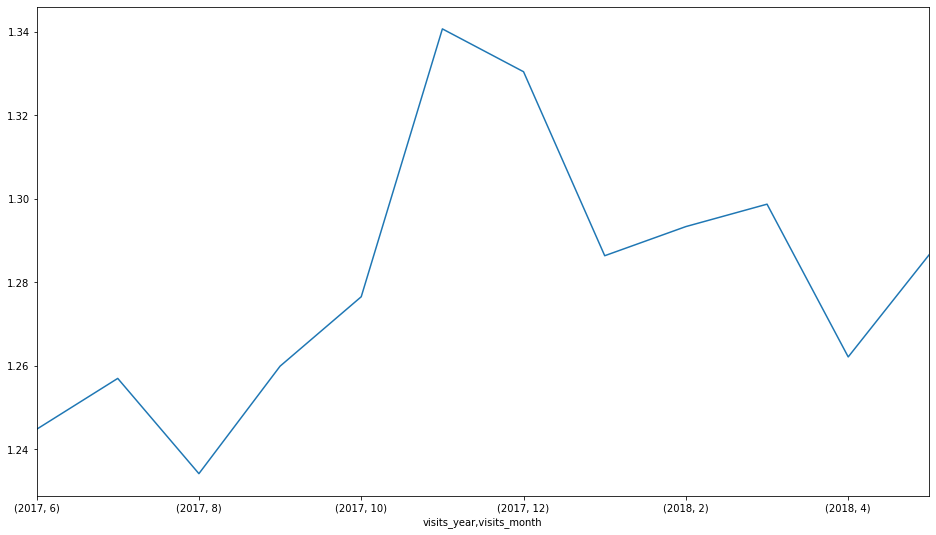

In [48]:
sessions_per_user['sess_per_user'].plot(figsize=(16,9))

В среднем  количество сессий на юзера =1.3

А среднаяя продолжительность сессии по моде равна минуте 
asl=60

#### расчет retention rate

In [49]:
visits_1=visits

In [50]:
visits_1

,device,end_ts,source_id,start_ts,uid,visits_year,visits_month,visits_week,visits_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19


In [51]:
visits_first_act=visits_1.groupby(('uid'))['start_ts'].min()

In [52]:
visits_first_act

uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: start_ts, Length: 228169, dtype: datetime64[ns]

In [53]:
visits_first_act.name = 'first_activity_date_of_user'
visits_1 = visits_1.join(visits_first_act, on='uid')

In [54]:
visits_1['first_visit_month'] = visits_1['first_activity_date_of_user'].astype('datetime64[M]')
visits_1['visits_month'] = visits_1['visits_date'].astype('datetime64[M]')
visits_pivot=visits_1.pivot_table(
    index='first_visit_month',
    columns='visits_month',
    values='uid',
    aggfunc='nunique',
) 


In [55]:
visits_pivot

visits_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_visit_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,NaN,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
2017-08-01,NaN,NaN,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
2017-09-01,NaN,NaN,NaN,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
2017-10-01,NaN,NaN,NaN,NaN,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
2017-11-01,NaN,NaN,NaN,NaN,NaN,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,25268.0,1410.0,960.0,786.0,512.0,481.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22624.0,1351.0,890.0,565.0,458.0
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22197.0,1267.0,565.0,446.0


In [56]:
visits_1['visits_month'] = pd.to_datetime(
    visits_1['start_ts'], unit='d'
) - pd.to_timedelta(visits_1['visits_month'].dt.month, unit='d')
visits_1['first_visit_month'] = pd.to_datetime(
    visits_1['first_visit_month'], unit='d'
) - pd.to_timedelta(
    visits_1['first_visit_month'].dt.month, unit='d'
) 

In [57]:
visits_1['cohort_lifetime'] = (
    visits_1['visits_month'] - visits_1['first_visit_month']
)
visits_1['cohort_lifetime'] = visits_1[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
visits_1['cohort_lifetime'] = visits_1['cohort_lifetime'].astype(
    'int'
) 

In [58]:
cohorts = visits_1.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 

In [59]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_visit_month', 'uid']
]
print(initial_users_count) 

   first_visit_month    uid
0         2017-05-26  13259
13        2017-06-24  12859
25        2017-07-24   9753
36        2017-08-23  16704
46        2017-09-21  25261
55        2017-10-21  27248
63        2017-11-19  24882
70        2017-12-31  21950
75        2018-01-30  22197
79        2018-02-26  20588
82        2018-03-28  15709
84        2018-04-26  14207


In [60]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

In [61]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month') 

In [62]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 

средний ретеншн по всем когортам:

In [63]:
cohorts['retention'].mean() 

0.17665193252140646

На второй месяц:

In [64]:
cohorts_retention=cohorts.loc[cohorts['cohort_lifetime']>0,'retention']

In [65]:
retention_pivot = cohorts.query('cohort_lifetime>=1').pivot_table(
    index='first_visit_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
).round(2)

In [66]:
retention_pivot

cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11,12
first_visit_month,,,,,,,,,,,,
2017-05-26,0.08,0.05,0.07,0.07,0.07,0.05,0.05,0.06,0.05,0.04,0.04,0.0
2017-06-24,0.08,0.05,0.06,0.06,0.04,0.04,0.05,0.05,0.03,0.03,0.00,NaN
2017-07-24,0.12,0.07,0.07,0.05,0.04,0.04,0.04,0.03,0.03,0.00,NaN,NaN
2017-08-23,0.08,0.07,0.05,0.03,0.04,0.04,0.03,0.02,0.00,NaN,NaN,NaN
2017-09-21,0.11,0.05,0.03,0.04,0.03,0.02,0.02,0.00,NaN,NaN,NaN,NaN
2017-10-21,0.07,0.03,0.04,0.03,0.03,0.02,0.01,NaN,NaN,NaN,NaN,NaN
2017-11-19,0.06,0.04,0.04,0.02,0.02,0.01,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31,0.10,0.04,0.03,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-30,0.05,0.03,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
cohorts_retention=cohorts.loc[cohorts['cohort_lifetime']==1,'retention'].mean()

Средний процент возрвата юзеров на 2 месяц жизни равен 7.75% Люди покупают билеты и не всегда возвращаются слишком часто

In [68]:
cohorts_retention

0.0775716572265424

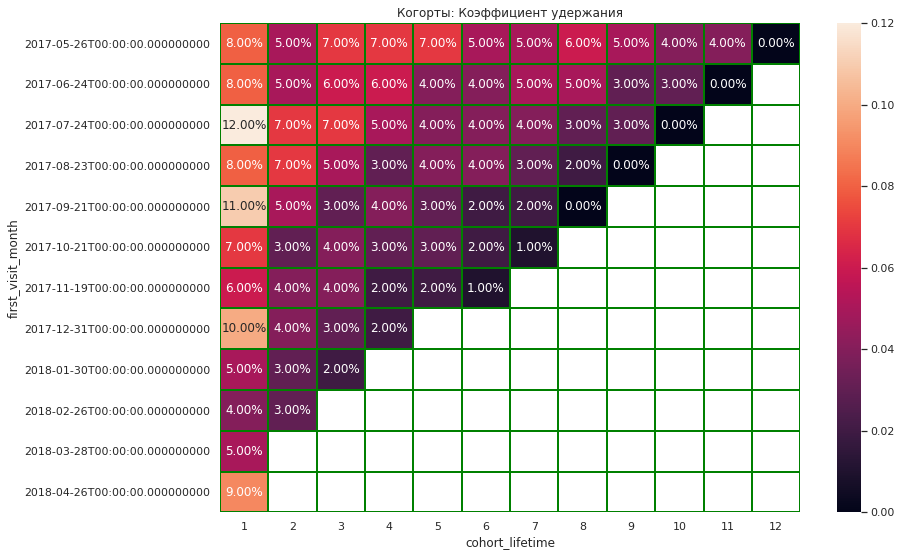

In [69]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: Коэффициент удержания')
sns.heatmap(retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='green'); 

2 месяц жизни когорт это столбец с индексом 1

Можем заметить что коэффициент удержания по месяцам  уменьшается, но для продажи определенных вещей(у нас яндекс афиша,скорее всего билетов) это норма.Вопрос на сколько такие ухудшения коэффициент удержания норма

Летний  коэффициент удержания  больший(июньские-октябрьские фестивали) , сентябрьская когорта имеет также высокий  коэффициент удержания ,возможно изза докупки билетов и потому что это самый сезон и есть люди,которые возвращаются как истенные любители концертов

In [70]:
retention_pivot.index = retention_pivot.index.strftime("%m/%Y")

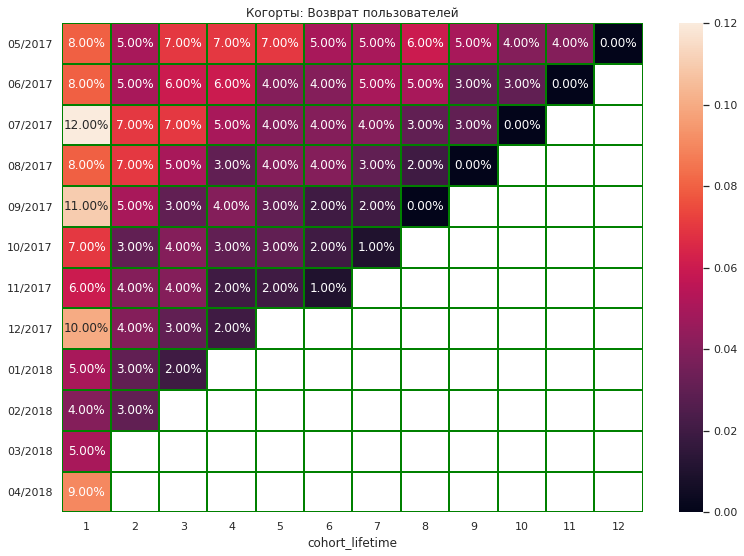

In [71]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: Возврат пользователей')
sns.heatmap(retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='green'); 

## E-commerce метрики

#### время на покупку

In [72]:
visits

,device,end_ts,source_id,start_ts,uid,visits_year,visits_month,visits_week,visits_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19


In [73]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [74]:
orders_2=orders

In [75]:
orders_2

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [76]:
orders_1=orders

In [77]:
first_visits_1=visits.groupby('uid')['start_ts'].min().to_frame()

In [78]:
first_visits_1

,start_ts
uid,
11863502262781,2018-03-01 17:27:00
49537067089222,2018-02-06 15:55:00
297729379853735,2017-06-07 18:47:00
313578113262317,2017-09-18 22:49:00
325320750514679,2017-09-30 14:29:00
...,...
18446403737806311543,2017-11-30 03:36:00
18446424184725333426,2017-12-06 20:32:00
18446556406699109058,2018-01-01 16:29:00


In [79]:
orders_1=orders_1.groupby('uid')['buy_ts'].min().to_frame()

In [80]:
orders_1

,buy_ts
uid,
313578113262317,2018-01-03 21:51:00
1575281904278712,2017-06-03 10:13:00
2429014661409475,2017-10-11 18:33:00
2464366381792757,2018-01-28 15:54:00
2551852515556206,2017-11-24 10:14:00
...,...
18445147675727495770,2017-11-24 09:03:00
18445407535914413204,2017-09-22 23:55:00
18445601152732270159,2018-03-26 22:54:00


In [81]:
orders_avg_time=orders_1.join(first_visits_1,on='uid',how='inner')

In [82]:
orders_avg_time.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 36523 entries, 313578113262317 to 18446167067214817906
Data columns (total 2 columns):
buy_ts      36523 non-null object
start_ts    36523 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 856.0+ KB


In [83]:
orders_avg_time

,buy_ts,start_ts
uid,,
313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...
18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00
18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00
18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00


In [84]:
orders_avg_time['buy_ts']=pd.to_datetime(orders_avg_time['buy_ts'])

In [85]:
orders_avg_time['diff']=orders_avg_time['buy_ts']-orders_avg_time['start_ts']

In [86]:
orders_avg_time['buy_ts'].dt.day
orders_avg_time['start_ts'].dt.day

uid
313578113262317         18
1575281904278712         3
2429014661409475        11
2464366381792757        27
2551852515556206        24
                        ..
18445147675727495770    20
18445407535914413204    22
18445601152732270159     7
18446156210226471712     7
18446167067214817906    17
Name: start_ts, Length: 36523, dtype: int64

In [87]:
orders_avg_time['diff'].mean()

Timedelta('16 days 21:40:10.550064')

Возможно после первого визита ,нужно посовещаься с друзьями на какой концерт и сколько билетов брать, чтобы посетить мероприятие

In [88]:
orders_avg_time

,buy_ts,start_ts,diff
uid,,,
313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,106 days 23:02:00
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00
2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0 days 01:19:00
2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,0 days 19:44:00
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00
...,...,...,...
18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00,95 days 19:33:00
18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00,0 days 00:07:00
18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00,231 days 11:03:00


In [89]:
orders_avg_time['diff'].median()

Timedelta('0 days 00:16:00')

В среднем на покупку уходит 16 минут( возможно,чтобы подготовить друзей на мероприятие)

---рассчитаем среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;

#### Среднее количество покупок и средний чек

In [90]:
orders['buy_ts']=pd.to_datetime(orders['buy_ts'])

In [91]:
orders['visits_year']  = orders['buy_ts'].dt.year
orders['visits_month'] = orders['buy_ts'].dt.month
orders['visits_week']  = orders['buy_ts'].dt.week
orders['visits_date'] = orders['buy_ts'].dt.date

In [92]:
orders['visits_month'].value_counts().sort_values()

8     1807
6     2355
7     2363
4     3273
9     3387
5     4346
1     4721
2     5281
3     5326
11    5659
10    5679
12    6218
Name: visits_month, dtype: int64

In [93]:
orders_period=orders.query('visits_month>0 and visits_month<7')

In [94]:
orders_period.groupby('visits_month')['revenue'].sum()

visits_month
1    19417.13
2    25560.54
3    28834.59
4    16858.06
5    20735.98
6     9560.91
Name: revenue, dtype: float64

In [95]:
orders_period_grouped=orders_period.groupby('visits_month').agg({'uid':'count','revenue':['count','sum']})

In [96]:
orders_period_grouped=orders_period_grouped.reset_index()

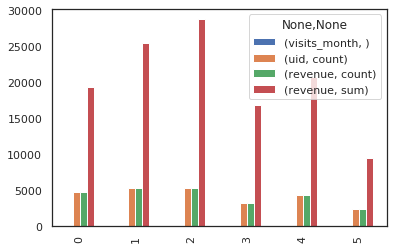

In [97]:
orders_period_grouped.plot(kind='bar')

In [98]:
orders_mean_month= (orders_period_grouped['revenue'].sum() / orders_period_grouped['uid'].count()).mean()


In [99]:
orders_mean_month

4217.0

В среднем покупки в месяц выходят на 4217 уе

In [100]:
orders_period_week=orders_period.groupby('visits_week').agg({'uid':'count','revenue':['count','sum']})

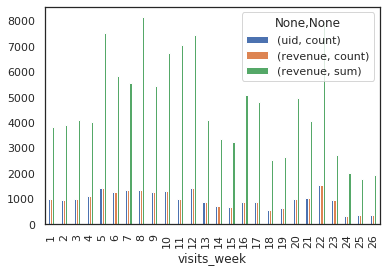

In [101]:
orders_period_week.plot(kind='bar')

In [102]:
orders_period_week=orders_period_week.reset_index()

In [103]:
orders_period_week=(orders_period_week['revenue'].sum() / orders_period_week['uid'].count()).mean()

In [104]:
orders_period_week

973.1538461538462

Среднее количество затрат в неделю составляет  973 УЕ

Распределения нормальные

### Расчитаем средний чек

In [105]:
orders

,buy_ts,revenue,uid,visits_year,visits_month,visits_week,visits_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,22,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,22,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,22,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,22,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,22,2017-06-01
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018,5,22,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018,5,22,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018,5,22,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018,5,22,2018-05-31


In [106]:
orders_bill=orders.groupby('buy_ts').agg({'uid':'nunique','revenue':'sum'})

In [107]:
orders_bill

,uid,revenue
buy_ts,,
2017-06-01 00:10:00,1,17.00
2017-06-01 00:25:00,1,0.55
2017-06-01 00:27:00,1,0.37
2017-06-01 00:29:00,1,0.55
2017-06-01 07:58:00,1,0.37
...,...,...
2018-05-31 23:43:00,1,3.67
2018-05-31 23:50:00,2,10.44
2018-05-31 23:54:00,1,0.30


In [108]:
orders_bill

,uid,revenue
buy_ts,,
2017-06-01 00:10:00,1,17.00
2017-06-01 00:25:00,1,0.55
2017-06-01 00:27:00,1,0.37
2017-06-01 00:29:00,1,0.55
2017-06-01 07:58:00,1,0.37
...,...,...
2018-05-31 23:43:00,1,3.67
2018-05-31 23:50:00,2,10.44
2018-05-31 23:54:00,1,0.30


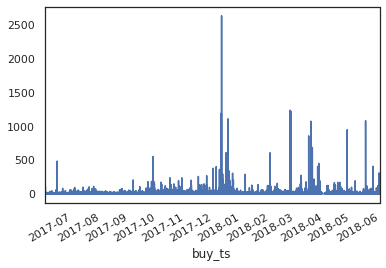

In [109]:
orders_bill.groupby('buy_ts')['revenue'].sum().plot()

In [110]:
orders_bill_avg=(orders_bill['revenue'].sum()/orders_bill['uid'].count()).mean()

In [111]:
orders_bill_avg

5.480576634558935

Средний чек равен 5.48 У.E

#### Расчет LTV по когортам

In [112]:
orders_1=orders

In [113]:
orders['revenue'].sum()

252057.19999999998

In [114]:
orders['buy_ts'].describe() 

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [115]:
orders['orders_month'] = orders['buy_ts'].astype('datetime64[M]')

In [116]:
first_orders = orders.groupby('uid').agg({'orders_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
print(first_orders.head()) 

                uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01


In [117]:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes.head()) 

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340


In [118]:
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new

,buy_ts,revenue,uid,visits_year,visits_month,visits_week,visits_date,orders_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,22,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,22,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,22,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,22,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,22,2017-06-01,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018,5,22,2018-05-31,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018,5,22,2018-05-31,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018,5,22,2018-05-31,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018,5,22,2018-05-31,2018-05-01,2018-05-01


In [119]:
cohorts_sellings = (
    orders_new.groupby(['first_order_month', 'orders_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts_sellings

,first_order_month,orders_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [120]:
final = pd.merge(cohort_sizes, cohorts_sellings, on='first_order_month')

In [121]:
final

,first_order_month,n_buyers,orders_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


In [122]:
final['first_order_month'].value_counts

<bound method IndexOpsMixin.value_counts of 0    2017-06-01
1    2017-06-01
2    2017-06-01
3    2017-06-01
4    2017-06-01
        ...    
74   2018-03-01
75   2018-04-01
76   2018-04-01
77   2018-05-01
78   2018-06-01
Name: first_order_month, Length: 79, dtype: datetime64[ns]>

In [123]:
margin_rate = 1

final['gp'] = final['revenue'] * margin_rate
final['age'] = (
    final['orders_month'] - final['first_order_month']
) / np.timedelta64(1, 'M')
final['age'] = final['age'].round().astype('int')
print(final.head()) 

  first_order_month  n_buyers orders_month  revenue       gp  age
0        2017-06-01      2023   2017-06-01  9557.49  9557.49    0
1        2017-06-01      2023   2017-07-01   981.82   981.82    1
2        2017-06-01      2023   2017-08-01   885.34   885.34    2
3        2017-06-01      2023   2017-09-01  1931.30  1931.30    3
4        2017-06-01      2023   2017-10-01  2068.58  2068.58    4


In [124]:
final['ltv'] = final['gp'] / final['n_buyers']

output_ltv= final.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round(2)


output_ltv.cumsum(axis=1).mean(axis=0)


age
0      4.801538
1      5.396364
2      5.823000
3      6.690000
4      7.297500
5      7.970000
6      8.385000
7      9.084000
8     10.060000
9      9.253333
10    10.010000
11    11.880000
dtype: float64

In [125]:
output_ltv.cumsum(axis=1)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.40,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37,7.58,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.87,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.52,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


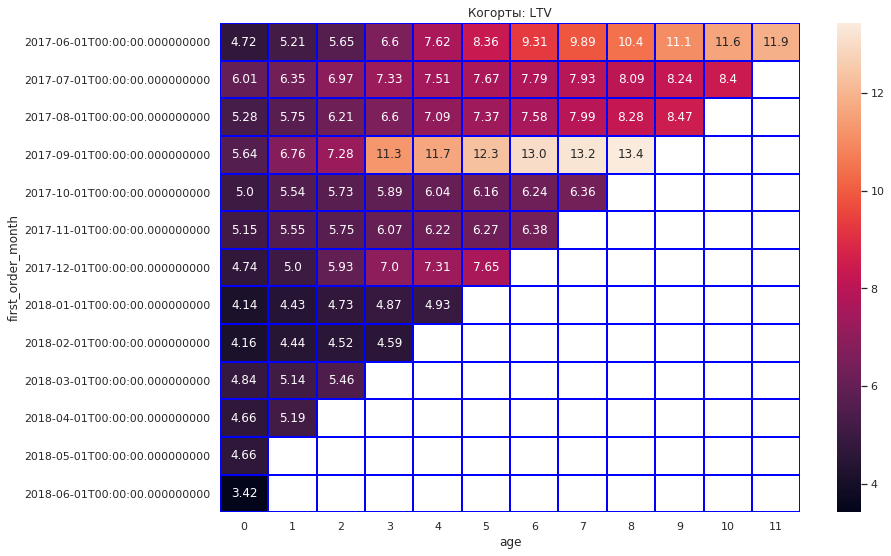

In [126]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: LTV')
sns.heatmap(output_ltv.cumsum(axis=1), annot=True, fmt='.3', linewidths=1, linecolor='blue'); 

In [127]:
orders_period_week

973.1538461538462

In [128]:
cohort_size = output_ltv.iloc[0:6]

рассмотрим когорты, что живут больше полугода

In [129]:
cohort_size

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,NaN
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,NaN,NaN
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,NaN,NaN,NaN
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,NaN,NaN,NaN,NaN
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05,0.11,NaN,NaN,NaN,NaN,NaN


In [130]:
cohort_size.cumsum(axis=1).mean(axis=0).iloc[1:7].fillna('')

age
1    5.860000
2    6.265000
3    7.291667
4    7.690000
5    8.023333
6    8.385000
dtype: float64

In [131]:
cohort_size.mean()

age
0     5.300000
1     0.560000
2     0.405000
3     1.026667
4     0.398333
5     0.333333
6     0.361667
7     0.298000
8     0.295000
9     0.316667
10    0.365000
11    0.260000
dtype: float64

In [132]:
cohort_size.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05,0.11,,,,,


In [133]:
output_ltv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2017-06-01 to 2018-06-01
Data columns (total 12 columns):
0     13 non-null float64
1     11 non-null float64
2     10 non-null float64
3     9 non-null float64
4     8 non-null float64
5     7 non-null float64
6     6 non-null float64
7     5 non-null float64
8     4 non-null float64
9     3 non-null float64
10    2 non-null float64
11    1 non-null float64
dtypes: float64(12)
memory usage: 1.3 KB


In [134]:
cohort_size.index = cohort_size.index.strftime("%m/%Y")

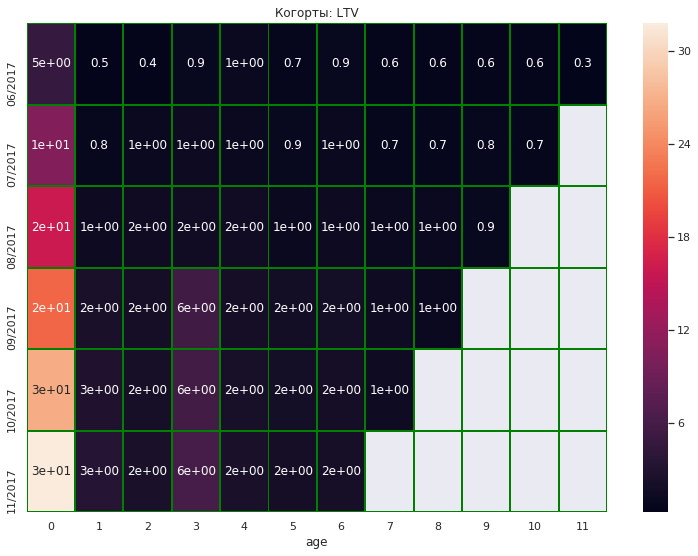

In [135]:
sns.set(style='darkgrid')
plt.figure(figsize=(13, 9))
plt.title('Когорты: LTV')
sns.heatmap(cohort_size.cumsum(), annot=True, fmt='.1', linewidths=1, linecolor='green'); 

Видно что возрват покупателей просиходит крайне редко, видимо идет продажа чего-то разового

в среднем покупатель первой когорты принес 13 У.Е

Единственная выделяющаяся когорта-когорта сентябрьская и то,выглядит как выброс 

Вывод ltv критически низкий, по возможно обусловленным причинам(не каждый день люди на концерты ходят,а тем более не каждый за год по много раз от одного сервиса,задача трудная вести такой бизнес)

P.S как я понял сделал в соотвествии с заданием,посчитав сначала всю корогрту а затем,отфильтровав ее взял целевую

## Маркетинг

2.3.1. Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени;

In [136]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [137]:
costs['dt'].describe()

count           2542
unique           364
top       2017-11-25
freq               7
Name: dt, dtype: object

In [138]:
costs['dt']=costs['dt'].astype('datetime64[M]')

In [139]:
costs['costs'].sum()

329131.62

на рекламу ушло:329131.62 уе

Распределение по источникам:

In [140]:
monthly_costs = costs.groupby(['dt','source_id']).agg({'costs':'sum'})

In [141]:
monthly_costs=monthly_costs.reset_index()

In [142]:
monthly_costs

,dt,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [143]:
costs_group_time=costs.groupby(['dt'])['costs'].sum()

In [144]:
costs_group_time

dt
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

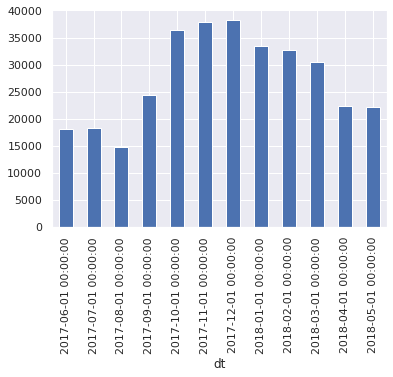

In [145]:
costs_group_time.plot(kind='bar')

вложения по месяцам:

Диаграмма показывает что вложения в 3 ий источник слишком большие,посмотрим как это окупится

In [146]:
costs_source=costs.groupby(['source_id'])['costs'].sum()

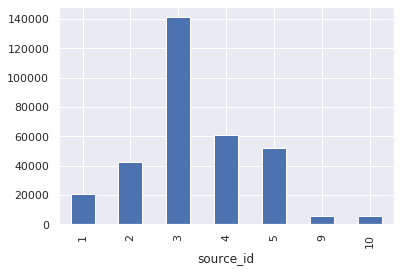

In [147]:
costs_source.plot(kind='bar')

В августе затраты на рекламу падают,в самый разгар концертов

Больше всего вложений произведено в третью источник трафика 

#### Рассчёт среднего CAC на одного покупателя для  проекта и для каждого источника трафика. 

Найдем первый источник которым пользовались 

In [148]:
visits_1=visits_1.sort_values(by='start_ts',ascending=True)

In [149]:
visits_for_cac=visits_1.groupby(['uid'])['source_id'].first()

In [150]:
visits_for_cac=visits_for_cac.reset_index()

In [151]:
visits_for_cac

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
...,...,...
228164,18446403737806311543,5
228165,18446424184725333426,4
228166,18446556406699109058,3
228167,18446621818809592527,4


In [152]:
orders_2=orders_2.drop(['visits_year','visits_month','visits_week','visits_date','orders_month'],axis=1)

In [153]:
orders_2['order_month']=orders_2['buy_ts'].astype('datetime64[M]')

In [154]:
orders_2

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01


In [155]:
orders_last=orders_2.merge(visits_for_cac,on='uid',how='left')

In [156]:
orders_last

,buy_ts,revenue,uid,order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,3


In [157]:
first_orders = orders_last.groupby(['uid','source_id']).agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid','source_id', 'first_order_month']
first_orders

,uid,source_id,first_order_month
0,313578113262317,2,2018-01-01
1,1575281904278712,10,2017-06-01
2,2429014661409475,3,2017-10-01
3,2464366381792757,5,2018-01-01
4,2551852515556206,5,2017-11-01
...,...,...,...
36518,18445147675727495770,5,2017-11-01
36519,18445407535914413204,3,2017-09-01
36520,18445601152732270159,2,2018-03-01
36521,18446156210226471712,3,2018-02-01


In [158]:
first_orders.groupby(['source_id','first_order_month']).agg({'uid': 'nunique'}).reset_index()

,source_id,first_order_month,uid
0,1,2017-06-01,190
1,1,2017-07-01,160
2,1,2017-08-01,113
3,1,2017-09-01,227
4,1,2017-10-01,340
...,...,...,...
81,10,2018-01-01,92
82,10,2018-02-01,123
83,10,2018-03-01,186
84,10,2018-04-01,107


In [159]:
cohort_sizes_1 = first_orders.groupby(['source_id','first_order_month']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes_1.columns = ['source_id','first_order_month','n_buyers']
cohort_sizes_1

,source_id,first_order_month,n_buyers
0,1,2017-06-01,190
1,1,2017-07-01,160
2,1,2017-08-01,113
3,1,2017-09-01,227
4,1,2017-10-01,340
...,...,...,...
81,10,2018-01-01,92
82,10,2018-02-01,123
83,10,2018-03-01,186
84,10,2018-04-01,107


In [160]:
orders_new = pd.merge(orders_last,first_orders, on=['uid','source_id'])

In [161]:
orders_new

,buy_ts,revenue,uid,order_month,source_id,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,4,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,10,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,3,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,3,2018-05-01


In [162]:
cohorts = (
    orders_new.groupby(['first_order_month', 'order_month','source_id'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
print(cohorts.head()) 

  first_order_month order_month  source_id  revenue
0        2017-06-01  2017-06-01          1  1378.70
1        2017-06-01  2017-06-01          2  1043.68
2        2017-06-01  2017-06-01          3  2804.34
3        2017-06-01  2017-06-01          4  1959.84
4        2017-06-01  2017-06-01          5  1898.89


In [163]:
report_last = pd.merge(cohort_sizes_1, cohorts, on=['first_order_month','source_id'])

In [164]:
report_last

,source_id,first_order_month,n_buyers,order_month,revenue
0,1,2017-06-01,190,2017-06-01,1378.70
1,1,2017-06-01,190,2017-07-01,414.98
2,1,2017-06-01,190,2017-08-01,419.43
3,1,2017-06-01,190,2017-09-01,714.24
4,1,2017-06-01,190,2017-10-01,811.20
...,...,...,...,...,...
511,10,2018-03-01,186,2018-03-01,638.44
512,10,2018-03-01,186,2018-04-01,12.71
513,10,2018-03-01,186,2018-05-01,6.29
514,10,2018-04-01,107,2018-04-01,261.93


In [165]:
margin_rate = 1

report_last['gp'] = report_last['revenue'] * margin_rate
report_last['age'] = (
    report_last['order_month'] - report_last['first_order_month']
) / np.timedelta64(1, 'M')
report_last['age'] = report_last['age'].round().astype('int')
report_last.head()

,source_id,first_order_month,n_buyers,order_month,revenue,gp,age
0,1,2017-06-01,190,2017-06-01,1378.70,1378.70,0
1,1,2017-06-01,190,2017-07-01,414.98,414.98,1
2,1,2017-06-01,190,2017-08-01,419.43,419.43,2
3,1,2017-06-01,190,2017-09-01,714.24,714.24,3
4,1,2017-06-01,190,2017-10-01,811.20,811.20,4


In [166]:
report_last['ltv'] = report_last['gp'] / report_last['n_buyers']

output_1 = report_last.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

output_1.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.538087,0.560005,0.64566,1.32244,1.36687,0.898439,1.19636,0.829692,0.711626,0.720439,0.682914,0.467524
2017-07-01,5.798336,0.384558,1.11674,0.453061,0.311879,0.231463,0.199387,0.188278,0.23848,0.232743,0.252983,
2017-08-01,4.839773,0.502769,0.487162,0.421881,0.499426,0.275007,0.24514,0.57043,0.452788,0.21757,,
2017-09-01,5.336339,1.70406,0.657591,2.76937,0.445724,0.595561,0.946744,0.325135,0.324358,,,
2017-10-01,5.089034,0.708755,0.249292,0.193893,0.183837,0.172989,0.0814887,0.129642,,,,
2017-11-01,5.282587,0.376777,0.268943,0.389857,0.159761,0.0636246,0.0947692,,,,,
2017-12-01,4.909693,0.380088,1.68607,1.97983,0.542301,0.523458,,,,,,
2018-01-01,4.041890,0.319214,0.393299,0.239937,0.0853122,,,,,,,
2018-02-01,4.225858,0.349753,0.0914392,0.142982,,,,,,,,


In [167]:
costs_month=costs.groupby(['source_id','dt']).agg({'costs':sum})

In [168]:
report_new = pd.merge(
    report_last, costs_month, left_on='first_order_month', right_on='dt'
)
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head() 

,source_id,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,costs,cac
0,1,2017-06-01,190,2017-06-01,1378.7,1378.7,0,7.256316,1125.61,5.924263
1,1,2017-06-01,190,2017-06-01,1378.7,1378.7,0,7.256316,2427.38,12.775684
2,1,2017-06-01,190,2017-06-01,1378.7,1378.7,0,7.256316,7731.65,40.692895
3,1,2017-06-01,190,2017-06-01,1378.7,1378.7,0,7.256316,3514.80,18.498947
4,1,2017-06-01,190,2017-06-01,1378.7,1378.7,0,7.256316,2616.12,13.769053


In [169]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output_romi = report_new.query('age>=1').pivot_table(
    index='first_order_month', columns='age', values='cac', aggfunc='mean'
)

output_romi.fillna('')

age,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,
2017-06-01,15.200082,13.2184,13.2184,13.2184,13.2184,13.2184,13.2184,15.2001,13.2184,13.2184,8.29274
2017-07-01,20.901383,15.8693,20.9014,15.8693,15.8693,15.8693,15.8693,20.9014,15.8693,15.8693,
2017-08-01,20.858835,20.8588,14.8176,14.8176,14.8176,14.8176,20.8588,14.8176,20.8588,,
2017-09-01,18.264474,18.2645,18.2645,18.2645,14.5619,14.5619,18.2645,18.2645,,,
2017-10-01,15.542579,15.5426,15.5426,15.5426,15.5426,15.5426,15.5426,,,,
2017-11-01,18.120757,18.1208,18.1208,18.1208,18.1208,18.1208,,,,,
2017-12-01,22.252244,15.2284,15.2284,15.2284,22.2522,,,,,,
2018-01-01,23.626254,23.6263,18.8894,18.8894,,,,,,,
2018-02-01,20.287619,20.2876,9.67122,,,,,,,,


In [170]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output_romi = report_new.query('age>=1').pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output_romi.cumsum(axis=1).fillna('')

age,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,
2017-06-01,0.176027,0.361211,0.765175,1.19785,1.50908,1.91125,2.15735,2.358,2.61433,2.85606,2.98648
2017-07-01,0.111098,0.352197,0.471172,0.539531,0.59987,0.64635,0.701187,0.754624,0.81152,0.871714,
2017-08-01,0.143195,0.282291,0.420783,0.595651,0.69601,0.770574,0.893447,0.996875,1.0539,,
2017-09-01,0.360871,0.52908,1.81287,1.94221,2.18598,2.45029,2.5288,2.58822,,,
2017-10-01,0.202441,0.274761,0.334139,0.391407,0.436886,0.468934,0.512565,,,,
2017-11-01,0.123948,0.185904,0.286791,0.332744,0.349471,0.385153,,,,,
2017-12-01,0.094595,0.486701,0.938222,1.07086,1.19367,,,,,,
2018-01-01,0.092897,0.188796,0.241294,0.264347,,,,,,,
2018-02-01,0.103929,0.133253,0.17202,,,,,,,,


In [171]:

output_romi.cumsum(axis=1).mean(axis=0)

age
1     0.156632
2     0.302659
3     0.604719
4     0.791826
5     0.995852
6     1.105425
7     1.358670
8     1.674428
9     1.493253
10    1.863887
11    2.986485
dtype: float64

в среднем роми окупился лишь двумя когортами хорошо, это сентябрьской и июньской

только 4 когорты неубыточны сами по себе

In [172]:
report_new

,source_id,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,costs,cac,romi
0,1,2017-06-01,190,2017-06-01,1378.70,1378.70,0,7.256316,1125.61,5.924263,1.224847
1,1,2017-06-01,190,2017-06-01,1378.70,1378.70,0,7.256316,2427.38,12.775684,0.567979
2,1,2017-06-01,190,2017-06-01,1378.70,1378.70,0,7.256316,7731.65,40.692895,0.178319
3,1,2017-06-01,190,2017-06-01,1378.70,1378.70,0,7.256316,3514.80,18.498947,0.392256
4,1,2017-06-01,190,2017-06-01,1378.70,1378.70,0,7.256316,2616.12,13.769053,0.527002
...,...,...,...,...,...,...,...,...,...,...,...
3600,10,2018-05-01,130,2018-05-01,470.89,470.89,0,3.622231,9411.42,72.395538,0.050034
3601,10,2018-05-01,130,2018-05-01,470.89,470.89,0,3.622231,4214.21,32.417000,0.111739
3602,10,2018-05-01,130,2018-05-01,470.89,470.89,0,3.622231,3669.56,28.227385,0.128323
3603,10,2018-05-01,130,2018-05-01,470.89,470.89,0,3.622231,362.17,2.785923,1.300191


In [173]:
report_new[report_new['source_id']==1]

,source_id,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,costs,cac,romi
0,1,2017-06-01,190,2017-06-01,1378.70,1378.70,0,7.256316,1125.61,5.924263,1.224847
1,1,2017-06-01,190,2017-06-01,1378.70,1378.70,0,7.256316,2427.38,12.775684,0.567979
2,1,2017-06-01,190,2017-06-01,1378.70,1378.70,0,7.256316,7731.65,40.692895,0.178319
3,1,2017-06-01,190,2017-06-01,1378.70,1378.70,0,7.256316,3514.80,18.498947,0.392256
4,1,2017-06-01,190,2017-06-01,1378.70,1378.70,0,7.256316,2616.12,13.769053,0.527002
...,...,...,...,...,...,...,...,...,...,...,...
3558,1,2018-05-01,241,2018-05-01,1258.19,1258.19,0,5.220705,9411.42,39.051535,0.133688
3559,1,2018-05-01,241,2018-05-01,1258.19,1258.19,0,5.220705,4214.21,17.486349,0.298559
3560,1,2018-05-01,241,2018-05-01,1258.19,1258.19,0,5.220705,3669.56,15.226390,0.342872
3561,1,2018-05-01,241,2018-05-01,1258.19,1258.19,0,5.220705,362.17,1.502780,3.474032


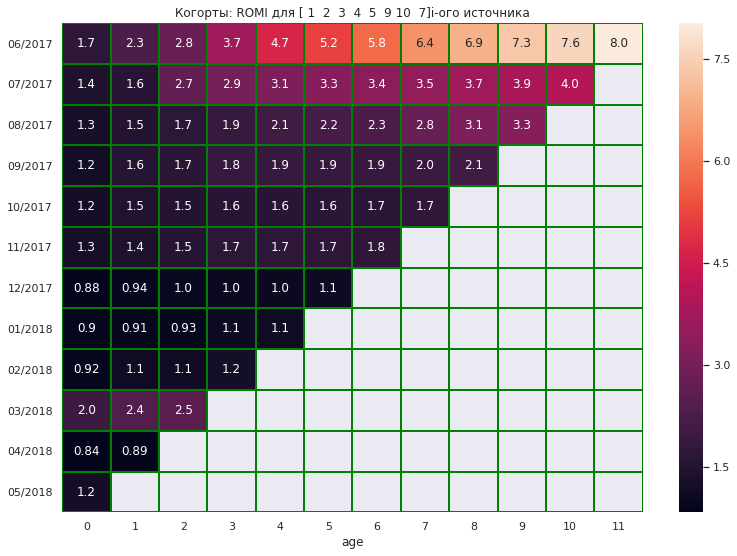

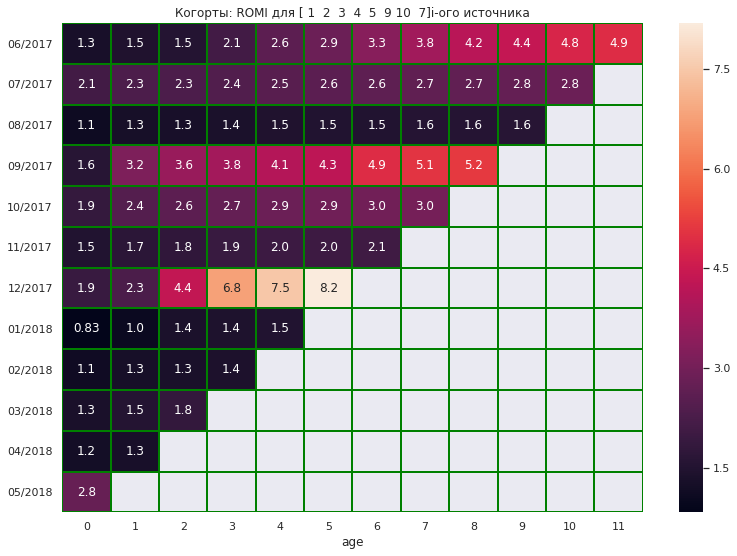

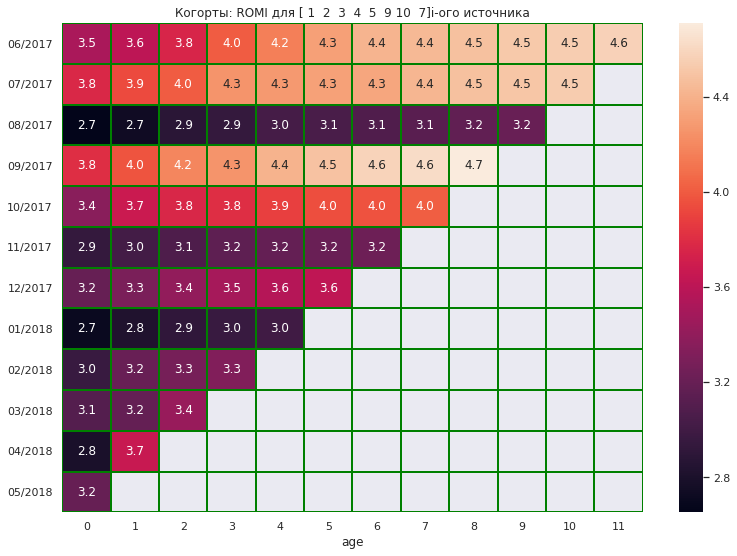

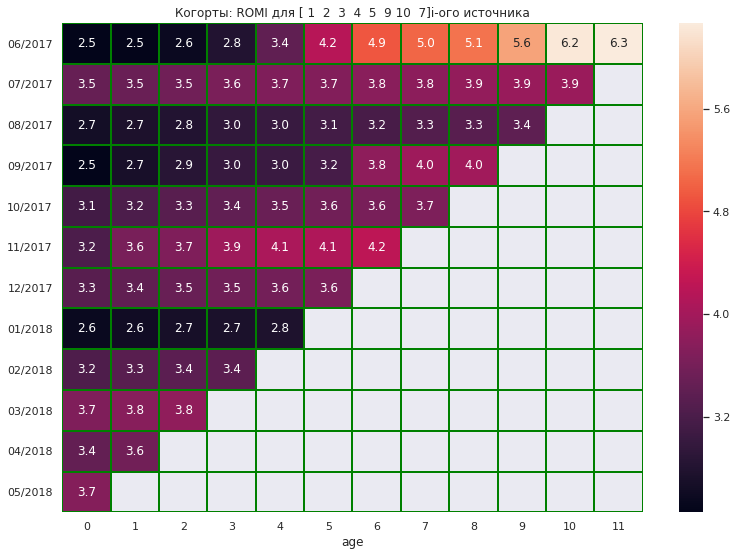

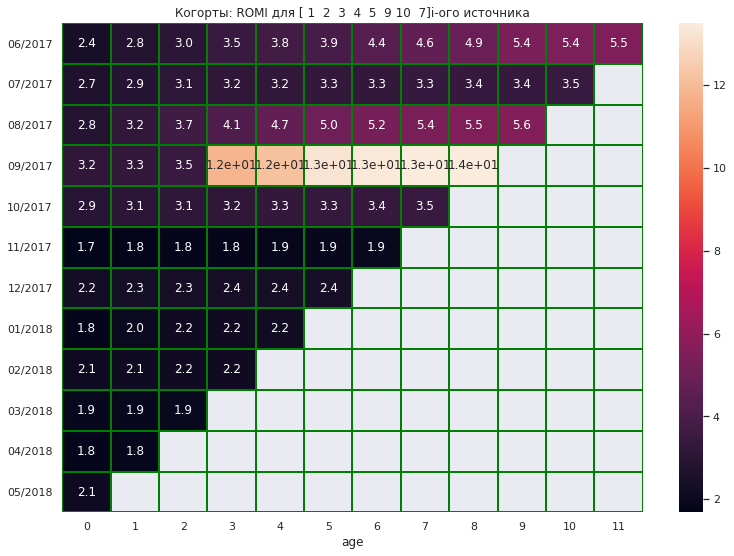

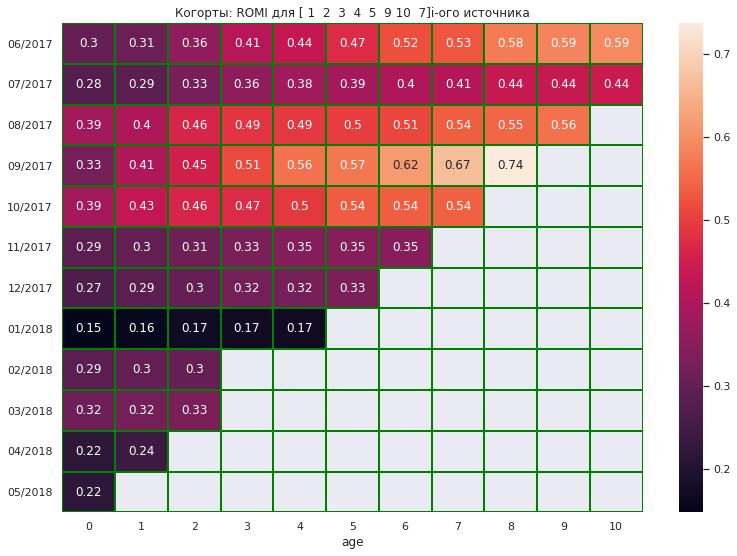

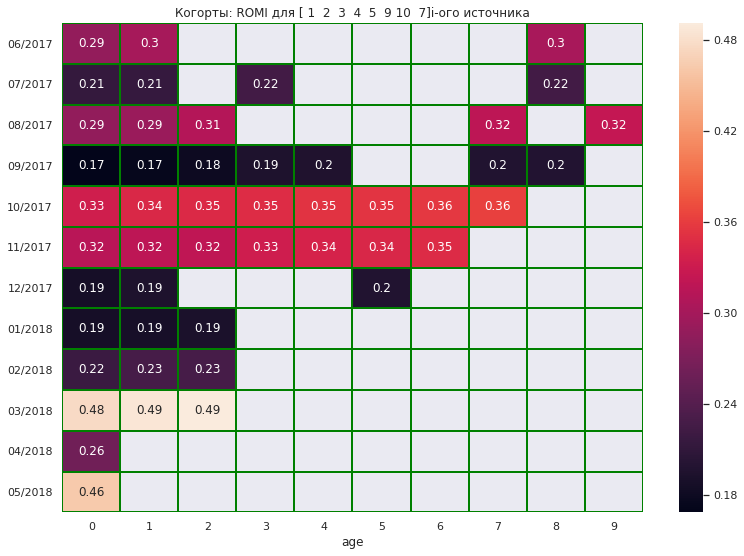

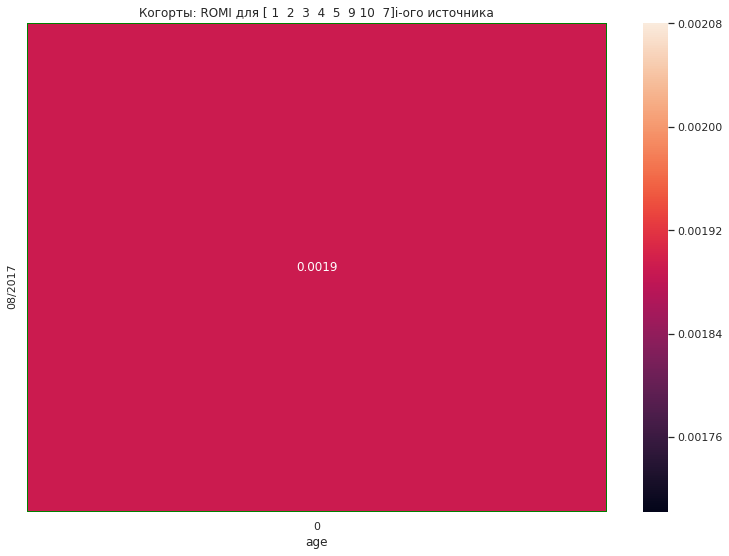

In [174]:
for source_id in report_new['source_id'].unique():
    source_id=report_new.query('source_id == @source_id').pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')
    source_id.index = source_id.index.strftime("%m/%Y")
    sns.set(style='darkgrid')
    plt.figure(figsize=(13, 9))
    plt.title('Когорты: ROMI для {}i-ого источника'.format(report_new['source_id'].unique()))
    sns.heatmap(source_id.cumsum(axis=1), annot=True, fmt='.2', linewidths=1, linecolor='green')
    source_id.cumsum(axis=1).mean(axis=0)
    

Данные пропущены потому что не каждый месяц платили  и пользовались источником

построим график измениений по месяцам

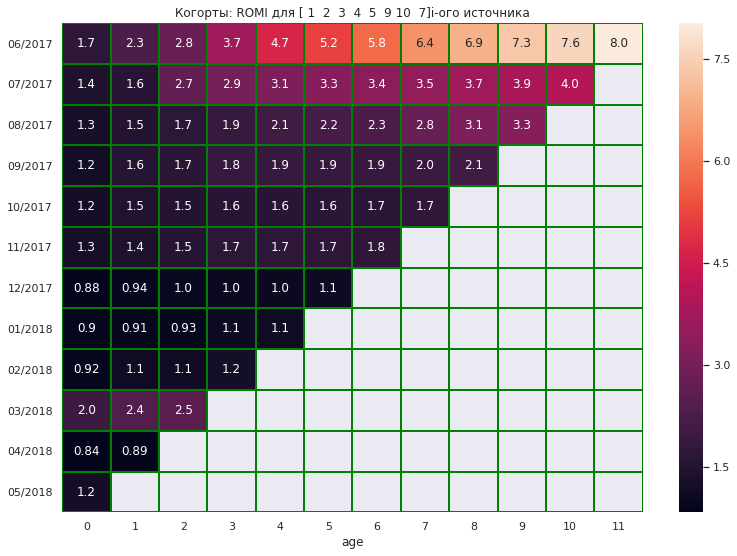

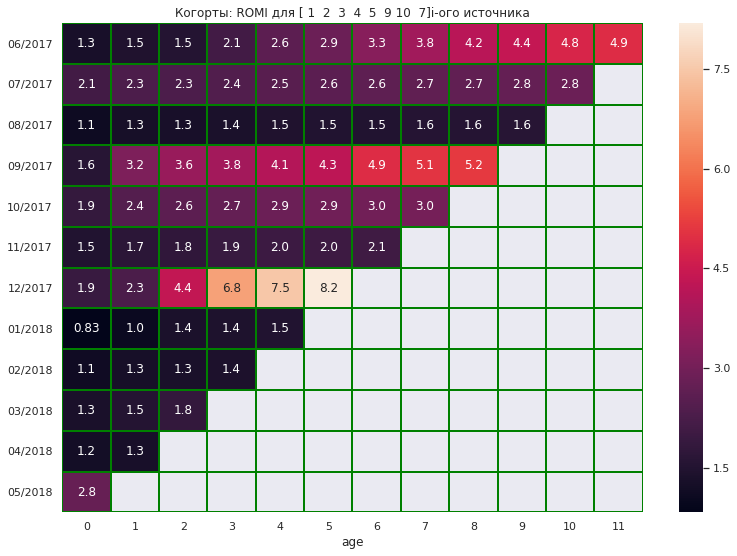

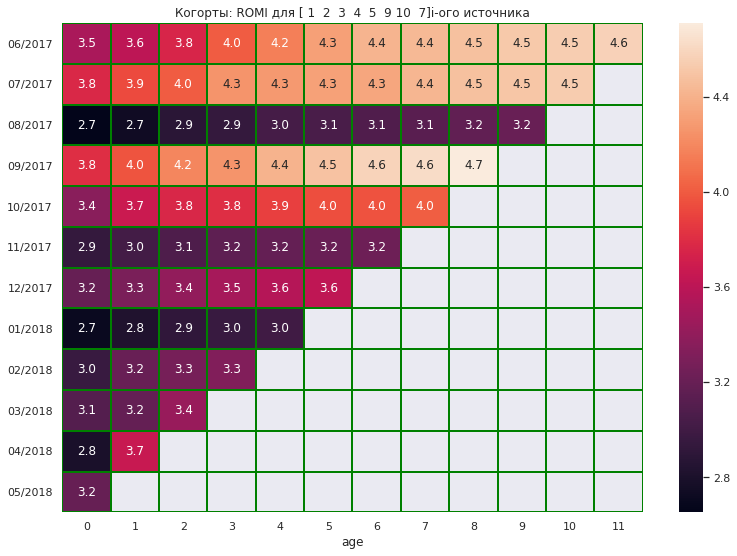

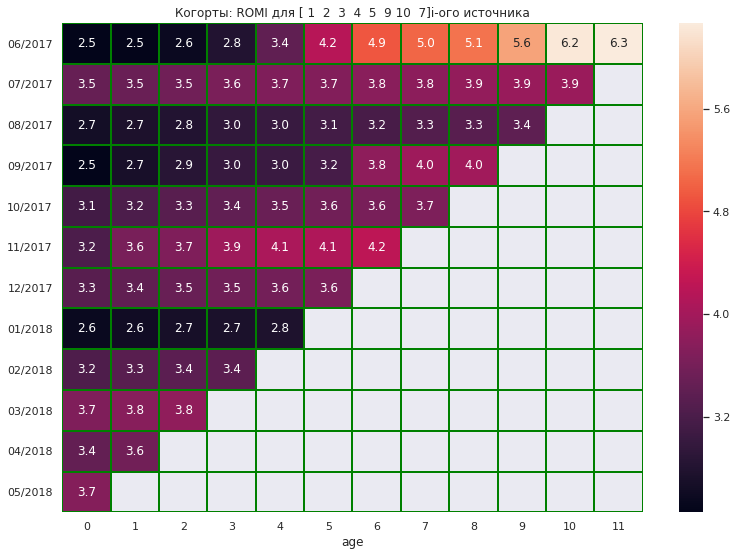

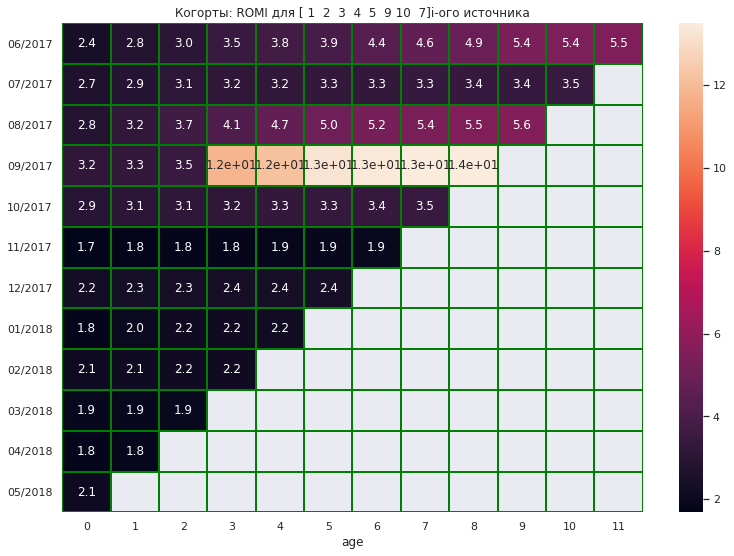

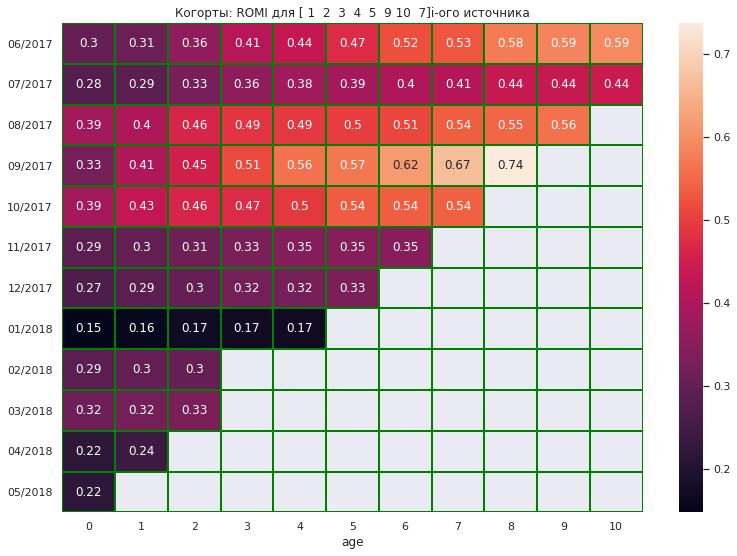

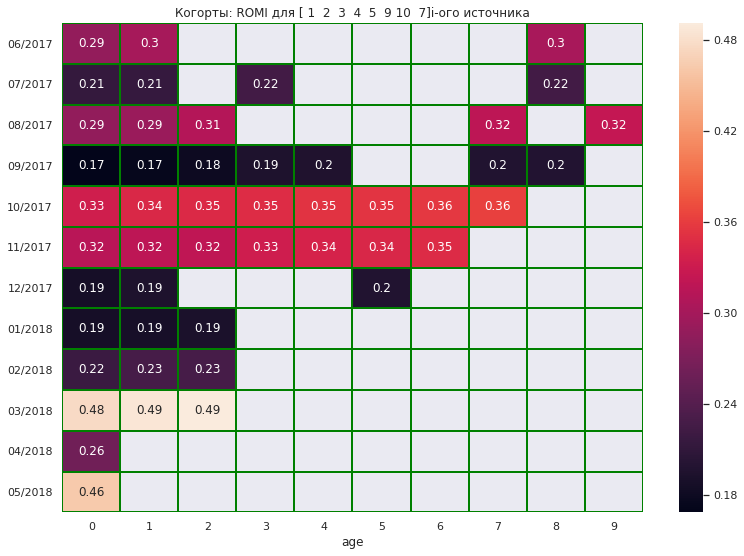

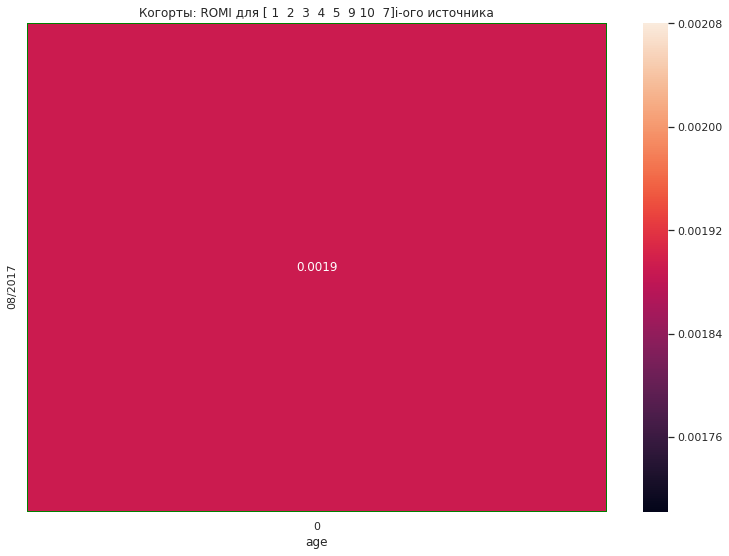

In [175]:
for source_id in report_new['source_id'].unique():
    source_id=report_new.query('source_id == @source_id').pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')
    source_id.index = source_id.index.strftime("%m/%Y")
    sns.set(style='darkgrid')
    plt.figure(figsize=(13, 9))
    plt.title('Когорты: ROMI для {}i-ого источника'.format(report_new['source_id'].unique()))
    sns.heatmap(source_id.cumsum(axis=1), annot=True, fmt='.2', linewidths=1, linecolor='green')
    


In [176]:
for source_id in report_new['source_id'].unique():
    source_id=report_new.query('source_id == @source_id').pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')
    print(source_id.cumsum(axis=1).mean(axis=0))

age
0     1.241917
1     1.455613
2     1.744831
3     1.884557
4     2.148332
5     2.421419
6     2.795569
7     3.267476
8     3.952412
9     4.820822
10    5.828341
11    8.022466
dtype: float64
age
0     1.555962
1     1.795685
2     2.206447
3     2.661695
4     3.058613
5     3.473228
6     2.898717
7     3.217065
8     3.400413
9     2.907841
10    3.815082
11    4.913662
dtype: float64
age
0     3.166392
1     3.375364
2     3.471696
3     3.578471
4     3.689866
5     3.851069
6     3.936062
7     4.128223
8     4.210147
9     4.076384
10    4.540174
11    4.568611
dtype: float64
age
0     3.113778
1     3.180465
2     3.218340
3     3.271342
4     3.382745
5     3.643777
6     3.926224
7     3.950857
8     4.081014
9     4.286710
10    5.069347
11    6.265814
dtype: float64
age
0     2.299359
1     2.474035
2     2.683005
3     3.807380
4     4.200313
5     4.721207
6     5.267195
7     6.066866
8     6.829484
9     4.811048
10    4.448838
11    5.493950
dtype: float64
age
0

Рассмотритм затраты на трафик в разрезе источников

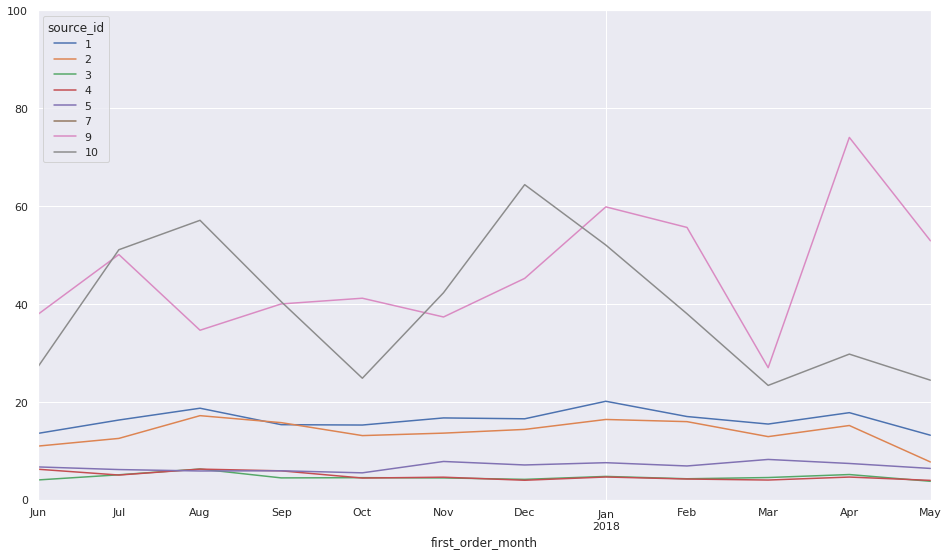

In [177]:
df=report_new.pivot_table(index = 'first_order_month', columns = 'source_id', values = 'cac', aggfunc = 'mean').plot(ylim=(0,100),figsize=(16,9))

In [178]:
costs['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

In [179]:
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

точно отказываемся от 9 ти 10 источников

# Общий вывод

Провели исследование где разделили пользователей яндекс афиши на когорты.

Наша задача была помочь маркетологам снизить расходы и отказаться от невыгодных источников трафика и перераспределить бюджет.

В ходе когортного анализа было выявлено несколько метрик:
Возврат (retention rate  изначально низкий в силу того что " ну не каждый же день на концерты ходить")


LTV(время жизни клиента и его ценность за все время)
показывает разовый положительный результат для каждой когорты, а дальше идет сильный спад
CAC-затраты на трафик


Romi-коэффициент который позволяет определять окупаемость.


Теперь эти метрики проанализируем и предложим выгодные трафики

---
Когортный анализ помог нам разбить на группы источники трафика и затраты и показал окупаемость/неокупаемость их

Продуктовые метрики:
фактор прилипчивости низкий
но dau wau mau имеет пропорциональное распределение.

E-сommerce метрики :
LTV метрика не превышает 15 процентов ==> ценность пользовотелей падает  


Маркетинговые метрики :
затраты на трафик в первый месяц - не окупается с течением времени.
1 2 3 4 5 источнки трафика выходили в romi>1  но не каждый из них приносил большую прибыль
retention rate не сильно растет.
От 10 9  источников нужно отказаться, их сас-выше остальных,но также и не предсказуем, но при всем при том еще и не выходящий в romi=1
5 источник также показывает мало процентов хоть и окупается
теперь касательно советов:
Графики показывали спад спроса в августе,и трафиком в августе мало пользвались, я считаю что нужно добавить опеределнные вложения в рекламу по 1-4 источникам в августе 

    
    1,2,3,4- Наши трафики!
    
    


# Советы маркетологам:

Итак:
- 1,4,2,5 трафики это успех, 3 тоже но на него выделяется львиная доля затрат, а выхлоп не такой чтобы сразу все покрыть.
- Июньские и сентябрьские когорты показывают класс,месяцы самые концертные и они те 2 когорты ,которые вывелись в плюс с коэффициенотм 3).
- в августе повысить затраты на рекламу для сентябрьских и октябрьских когорт
- Данные показывают что затраты на рекламу сильно увеличиваются осенью, в то время как летом падают, несмотря на то что летом
  наоборот ,как мне кажется,надо побольше вложиться как на середину лета, так и на осенний сезон чтобы получить большую прибыль
- если трафики 7 9 10 не бесплатные- полностью от них отказаться,  по 1 из них лишь  36 визитов 
- Улучшить возврат клиента акциями,промокодами при переходах с  источников в которые мы  вложились спустя полгода пользования ими
- затраты  c 3ьейго трафика можно будеь уменьщить вложениями в него

